In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Datasets/Diabetes.csv")

Cleaning Data

In [5]:
df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].mean())

In [7]:
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].mean())

Data Visualization

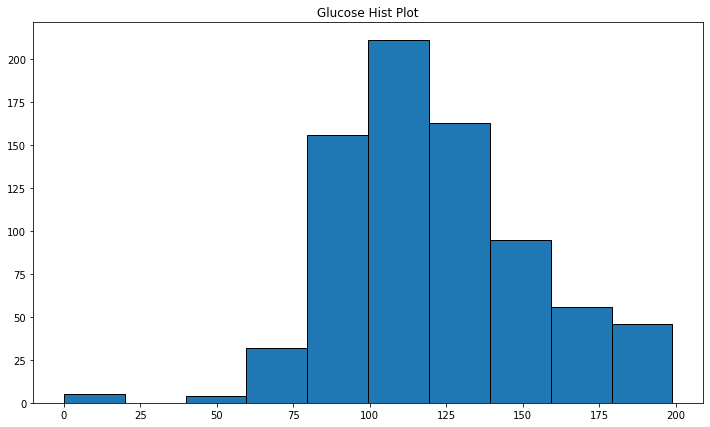

In [23]:
plt.figure(figsize=(12, 7))
plt.hist("Glucose", data = df, edgecolor = "k")
plt.title("Glucose Hist Plot")
plt.show()

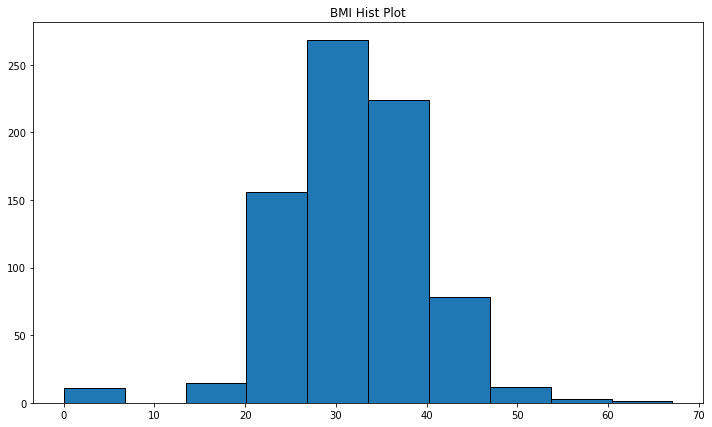

In [24]:
plt.figure(figsize = (12, 7))
plt.hist("BMI", data = df, edgecolor = "k")
plt.title("BMI Hist Plot")
plt.show()

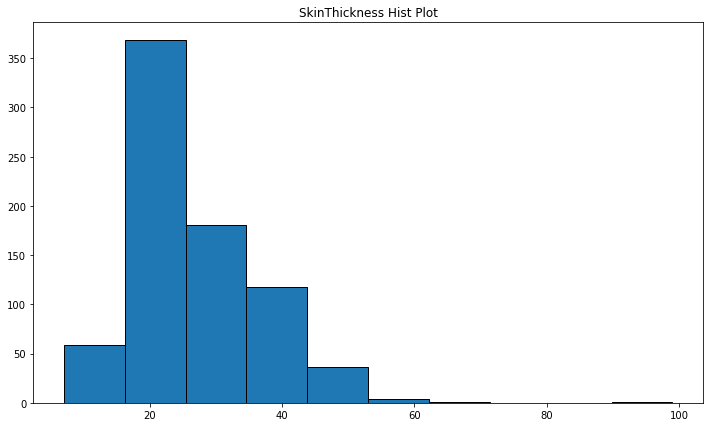

In [25]:
plt.figure(figsize = (12, 7))
plt.hist("SkinThickness", data = df, edgecolor = "k")
plt.title("SkinThickness Hist Plot")
plt.show()

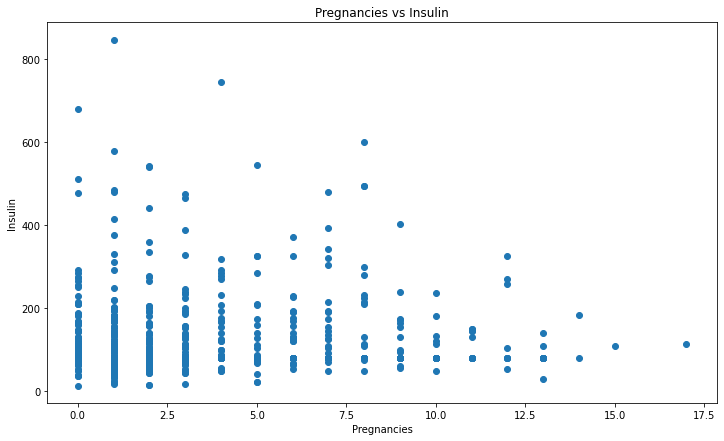

In [29]:
plt.figure(figsize=(12, 7))
plt.scatter("Pregnancies", "Insulin", data=df)
plt.title("Pregnancies vs Insulin")
plt.xlabel("Pregnancies")
plt.ylabel("Insulin")
plt.show()

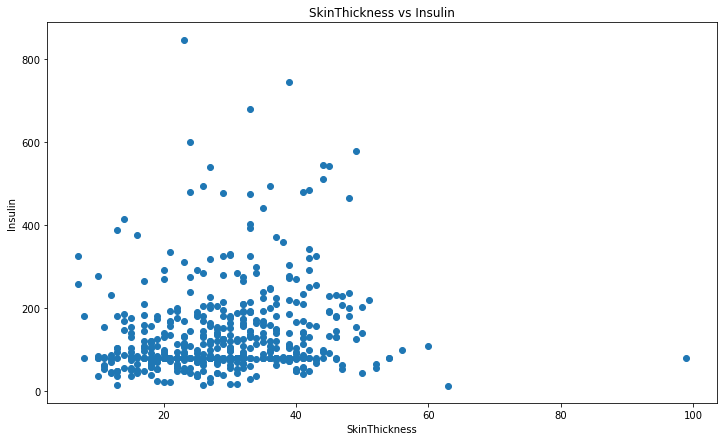

In [30]:
plt.figure(figsize = (12, 7))
plt.scatter("SkinThickness", "Insulin", data = df)
plt.title("SkinThickness vs Insulin")
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()

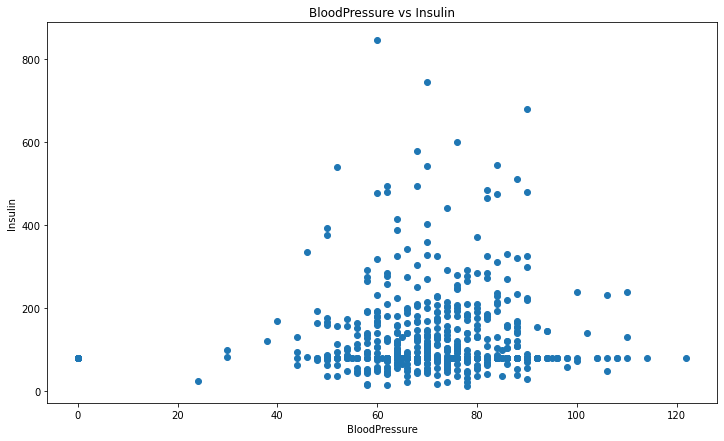

In [31]:
plt.figure(figsize = (12, 7))
plt.scatter("BloodPressure", "Insulin", data = df)
plt.title("BloodPressure vs Insulin")
plt.xlabel("BloodPressure")
plt.ylabel("Insulin")
plt.show()

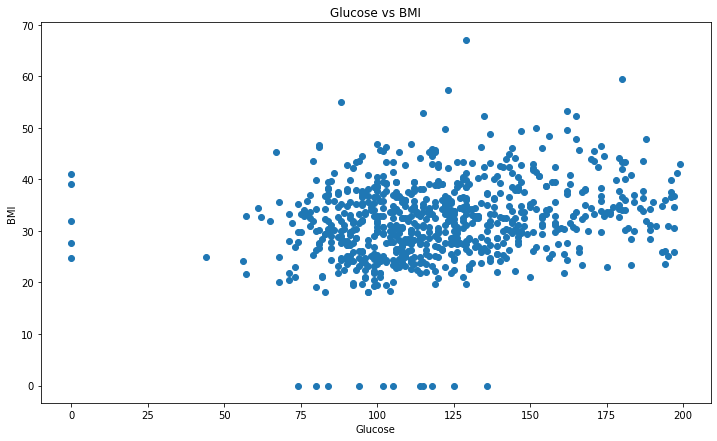

In [32]:
plt.figure(figsize = (12, 7))
plt.scatter("Glucose", "BMI", data = df)
plt.title("Glucose vs BMI")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()

Outlier Removal

Interquartile Range(IQR)

$$IQR = Q3 - Q1$$

In [35]:
def remove_outlier(dataFrame):
    for columnName in dataFrame.columns:
        Q1 = df[columnName].quantile(0.25)
        Q3 = df[columnName].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        print(f"{columnName} >> Lower limit:  {lower_limit}  \n Upper limit: {upper_limit}")
        dataFrame = dataFrame[(dataFrame[columnName] > lower_limit)|(dataFrame[columnName] < upper_limit)]
    return dataFrame

In [36]:
remove_outlier(df)

Pregnancies >> Lower limit:  -6.5  
 Upper limit: 13.5
Glucose >> Lower limit:  37.125  
 Upper limit: 202.125
BloodPressure >> Lower limit:  35.0  
 Upper limit: 107.0
SkinThickness >> Lower limit:  3.341145833333332  
 Upper limit: 49.1953125
Insulin >> Lower limit:  8.623697916666671  
 Upper limit: 198.42578125
BMI >> Lower limit:  13.35  
 Upper limit: 50.550000000000004
DiabetesPedigreeFunction >> Lower limit:  -0.32999999999999996  
 Upper limit: 1.2
Age >> Lower limit:  -1.5  
 Upper limit: 66.5
Outcome >> Lower limit:  -1.5  
 Upper limit: 2.5


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1
